# Wrangle and analyze data
# of the tweet archive of Twitter users @dog_rates (WeRateDogs)
by Alena Sukretna

## Introduction

The dataset that will be wrangled and analyzed and visualized is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 
The archived data contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. 

In [78]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import requests
import tweepy
import json
import csv
import sys
import time

## Gathering data

##### 1. The WeRateDogs Twitter archive

In [79]:
# Read the downloaded file twitter_archive_enhanced.csv and set it as a dataframe 
df = pd.read_csv("twitter-archive-enhanced.csv")
# Look at the data
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


##### 2. The tweet image predictions

Downloaded programmatically file image_predictions.tsv hosted on Udacity's servers.
This file contains The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

In [80]:
# Save to a file
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

with open(os.path.join(folder_name,
                      url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [81]:
#read tsv file
images = pd.read_table('image_predictions/image-predictions.tsv',
                       sep='\t')

In [82]:
#look at this file
images.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


##### 3. Query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file

Using Tweepy to query Twitter's API for additional data beyond the data included in the WeRateDogs Twitter archive. This additional data will include retweet count and favorite count.

The Twitter API is one that requires users to be authorized to use it. This means that before run API querying code, needed to set up  own Twitter application. And before that,  sign up for a Twitter account. 

In [18]:
# authentication
#https://www.slickremix.com/docs/how-to-get-api-keys-and-tokens-for-twitter/
#https://media.readthedocs.org/pdf/tweepy/latest/tweepy.pdf
#keys should not be shown

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True)


In [19]:
#Twitter Query using tweet_id information from the df (WeRateDogs Twitter archive)

tweet_ids = list(df.tweet_id)

tweet_data = {}
for tweet in tweet_ids:
    try:
        tweet_status = api.get_status(tweet,
                                      wait_on_rate_limit=True, 
                                      wait_on_rate_limit_notify=True)
        tweet_data[str(tweet)] = tweet_status._json
    except: 
        print("Error: " + str(tweet))


Error: 888202515573088257
Error: 873697596434513921
Error: 869988702071779329
Error: 866816280283807744
Error: 861769973181624320
Error: 845459076796616705
Error: 842892208864923648
Error: 837012587749474308
Error: 827228250799742977
Error: 802247111496568832
Error: 775096608509886464
Rate limit reached. Sleeping for: 722
Rate limit reached. Sleeping for: 724


In [20]:
#store data in a file tweet_json.txt
with open('tweet_json.txt', 'w') as outfile:  
    json.dump(tweet_data, outfile, 
              sort_keys = True,
              indent=4,
              ensure_ascii = False)

In [83]:
#create data frame tweets_df from the file  tweet_json.txt with 3 needed columns
with open('tweet_json.txt') as file:
    data = json.load(file)

df_list = []

for tweet_id in data.keys():
    retweets = data[tweet_id]['retweet_count']
    favorites = data[tweet_id]['favorite_count']
    df_list.append({'tweet_id': tweet_id,
                        'retweets': retweets,
                        'favorites': favorites})
    
tweets_df = pd.DataFrame(df_list, columns = ['tweet_id', 'retweets', 'favorites'])
tweets_df.head()

,tweet_id,retweets,favorites
0,666020888022790149,519,2520
1,666029285002620928,47,131
2,666033412701032449,45,126
3,666044226329800704,141,303
4,666049248165822465,40,109


In [7]:
tweets_df.tail()

,tweet_id,retweets,favorites
2340,891327558926688256,9543,40538
2341,891689557279858688,8771,42390
2342,891815181378084864,4226,25190
2343,892177421306343426,6363,33424
2344,892420643555336193,8664,39022


## Assessing data

After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least eight (8) quality issues and two (2) tidiness issues.

We have:
* df - WeRateDogs Twitter archive
* images - tweet image predictions
* tweets_df - each tweet's retweet count and favorite('like') count

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [14]:
#check most used names
df.name.value_counts().head(20)

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Penny       10
Tucker      10
Lola        10
Winston      9
Bo           9
the          8
Sadie        8
Toby         7
Buddy        7
an           7
Daisy        7
Bailey       7
Stanley      6
Dave         6
Name: name, dtype: int64

In [15]:
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [16]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id     2345 non-null object
retweets     2345 non-null int64
favorites    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


##### Quality Issues 
(Issues with the data's content)



**df**:
* names: None, a, the, an, actually, Am√©lie, by, his, incredibly, infuriating, just, life, light,mad, my, not, O, old, all, this, unacceptable, very, Fl√°vio, Fr√∂nq, G√≤rd√≥n, Olivi√©r, Ralph√©
* in_reply_to_status_id is float, in_reply_to_user_id is float, retweeted_status_id is float, retweeted_status_user_id is float
* retweeted_status_timestamp is str
* tweet_id column needs to be converted from a number to string value
* Date and Time columns need to be converted to datetime objects 
* in_reply_to_status_id, in_reply_to_user_id - only 78 rows
* retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp - retweeted data 
* expanded_urls: 2297 out of 2356
* text column is messy
* for 1 dog can be 2 stages
* Tweets that has been retweeted should be removed
* rating_numerator and rating_denominator fields are integers. This is not correct as there are observations with decimal ratings.


**images**:
* tweet_id column needs to be converted from a number to string value

**tweets_df**:
* tweet_id column needs to be converted from a number to string value

##### Tidyness Issues
(Issues with the data's structure)

* All data should be in 1 table for convenience

**df**:
* Drop columns that are not needed
* Combine each dog stage column into a single column named "stage"

**tweets_df**:
* Drop columns that are not needed

## Cleaning data

In [84]:
# Copy dataframes 
df_clean = df.copy()
images_clean = images.copy()
tweets_df_clean = tweets_df.copy()

### df_clean:

**1. Define**: unapproriate names  in names column: None, a, the, an, actually, Am√©lie, by, his, incredibly, infuriating, just, life, light, mad, my, not, O, old, all, this, unacceptable, very, Fl√°vio, Fr√∂nq, G√≤rd√≥n, Olivi√©r, Ralph√©

   **Code**: replace this names with None value or corrected Name

In [85]:
df_clean['name'].replace("a",'None', inplace=True)
df_clean['name'].replace('the', 'None', inplace=True)
df_clean['name'].replace("an",'None', inplace=True)
df_clean['name'].replace("actually",'None', inplace=True)
df_clean['name'].replace("by",'None', inplace=True)
df_clean['name'].replace("his",'None', inplace=True)
df_clean['name'].replace("incredibly",'None', inplace=True) 
df_clean['name'].replace("infuriating",'None', inplace=True) 
df_clean['name'].replace("just",'None', inplace=True)
df_clean['name'].replace("light",'None', inplace=True)
df_clean['name'].replace("life",'None', inplace=True)
df_clean['name'].replace("my",'None', inplace=True)
df_clean['name'].replace("mad",'None', inplace=True) 
df_clean['name'].replace("not",'None', inplace=True)
df_clean['name'].replace("O",'None', inplace=True)
df_clean['name'].replace("old",'None', inplace=True) 
df_clean['name'].replace("all",'None', inplace=True) 
df_clean['name'].replace("this",'None', inplace=True) 
df_clean['name'].replace("very",'None', inplace=True) 
df_clean['name'].replace("unacceptable",'None', inplace=True)
df_clean['name'].replace("Fl√°vio","Flavio", inplace=True)
df_clean['name'].replace("Fr√∂nq",'None', inplace=True)
df_clean['name'].replace("G√≤rd√≥n",'None', inplace=True)
df_clean['name'].replace("Olivi√©r", "Oliver", inplace=True)
df_clean['name'].replace("Ralph√©","Ralph", inplace=True)

**Test** :

In [86]:
df_clean.name.value_counts().head(20)

None       842
Charlie     12
Cooper      11
Oliver      11
Lucy        11
Penny       10
Lola        10
Tucker      10
Winston      9
Bo           9
Sadie        8
Daisy        7
Buddy        7
Toby         7
Bailey       7
Jax          6
Milo         6
Oscar        6
Stanley      6
Jack         6
Name: name, dtype: int64

**2. Define**: in_reply_to_status_id is float, in_reply_to_user_id is float, retweeted_status_id is float, retweeted_status_user_id is float, tweet_id column needs to be converted from a number to string value. 

But as we don't need first 4 mentioned above columns in the future, we can skip converting them and convert only tweet_id.

   **Code**: Convert float variables (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id) and int variable (tweet_id)  to string

In [87]:
#df_clean.in_reply_to_status_id = df_clean.in_reply_to_status_id.astype(str)
#df_clean.in_reply_to_user_id = df_clean.in_reply_to_user_id.astype(str)
#df_clean.retweeted_status_id = df_clean.retweeted_status_id.astype(str)
#df_clean.retweeted_status_user_id = df_clean.retweeted_status_user_id.astype(str)
df_clean.tweet_id = df_clean.tweet_id.astype(str)

**Test**:

In [88]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

**3. Define**: 
* timestamp column is string
* retweeted_status_timestamp is string - not necessary to convert as we don't need retweeted data

**Code**: convert timestamp  to datetime objects

In [89]:
df_clean.timestamp = pd.to_datetime(df_clean.timestamp)
#df_clean.retweeted_status_timestamp = pd.to_datetime(df_clean.retweeted_status_timestamp)

**Test**:

In [90]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

**4. Define**: Combine each dog stage column into a single column named "stage".

**Code**: combine data from columns 'doggo', 'floofer','pupper','puppo' in one column "stage"

In [91]:
df_clean['stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

**Test**:

In [92]:
df_clean['stage'].value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone       245
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: stage, dtype: int64

**4a. Define**:  sometimes for 1 dog there are 2 stages

**Code**:We need to clean 'stage' column where 2 stages for 1 dog: replace to None

In [93]:
df_clean['stage'].replace("doggoNonepupperNone",'NoneNoneNoneNone', inplace=True)
df_clean['stage'].replace("doggoNoneNonepuppo",'NoneNoneNoneNone', inplace=True)
df_clean['stage'].replace("doggoflooferNoneNone",'NoneNoneNoneNone', inplace=True)

**Test**:

In [94]:
df_clean['stage'].value_counts()

NoneNoneNoneNone       1990
NoneNonepupperNone      245
doggoNoneNoneNone        83
NoneNoneNonepuppo        29
NoneflooferNoneNone       9
Name: stage, dtype: int64

**4. (continuation)**

In [95]:
df_clean['stage'].replace("NoneNoneNoneNone","None ", inplace=True)
df_clean['stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)

**Test**:

In [96]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
stage                  

In [97]:
df_clean['stage'].value_counts()

None       1990
pupper      245
doggo        83
puppo        29
floofer       9
Name: stage, dtype: int64

###### **5. Define**:  Tweets that has been retweeted should be removed.

**Code**: Identify and remove tweets that have a retweeted_status because retweeted tweets are not original.

In [98]:
# Identify how many tweets are retweets by the "retweeted_status_id" column
df_clean['retweeted_status_id'].count()

181

In [99]:
# remove these values from the dataframe using the drop() function
df_clean.drop(df_clean[df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

**Test**:

In [100]:
df_clean['retweeted_status_id'].count()

0

**6. Define**: in_reply_to_status_id, in_reply_to_user_id - only 78 rows, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp - retweeted data, expanded_urls: 2297 out of 2356

**Code**: Remove columns that not needed from the df_clean dataset

In [101]:
df_clean.drop([
               'retweeted_status_user_id',
               'retweeted_status_id',
               'retweeted_status_timestamp',
               'in_reply_to_status_id',
               'in_reply_to_user_id',
               'in_reply_to_status_id',
               'expanded_urls',
               'source',
               'doggo',
               'floofer',
               'pupper',
               'puppo'
                      ], axis=1,inplace=True)

**Test**:

In [102]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 135.9+ KB


**7. Define**: rating_numerator and rating_denominator fields are both kept as integers. This is not correct as there are observations with decimal ratings

**Code**: convert both fields to float (with astype(float))

In [103]:
#convert both fields to float (with astype(float))
df_clean.rating_numerator = df_clean.rating_numerator.astype(float)
df_clean.rating_denominator = df_clean.rating_denominator.astype(float)

**Test**:

In [104]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  2175 non-null object
stage                 2175 non-null object
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 135.9+ KB


**7a. Define**: rating_numerator has observations with decimal ratings

**Code**: find all tweets with decimal numerators in their text and replace rating_numerators

In [105]:
#find all tweets with decimal numerators in their text
df_clean[df_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,5.0,10.0,Bella,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",75.0,10.0,Logan,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0,10.0,Sophie,pupper
1689,681340665377193984,2015-12-28 05:07:27,I've been told there's a slight possibility he...,5.0,10.0,None,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,26.0,10.0,None,None


In [106]:
df_clean.loc[45].text # rating should be 13.5

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [107]:
df_clean.loc[695].text # rating should be 9.75

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [108]:
df_clean.loc[763].text # rating should be 11.27

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [109]:
df_clean.loc[1689].text # rating should be 9.5

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

In [110]:
df_clean.loc[1712].text # rating should be 11.26

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [111]:
#replace raitings
df_clean.loc[45, 'rating_numerator'] = 13.5
df_clean.loc[695, 'rating_numerator'] = 9.75
df_clean.loc[763, 'rating_numerator'] = 11.27
df_clean.loc[1689, 'rating_numerator'] = 9.5
df_clean.loc[1712, 'rating_numerator'] = 11.26

**Test**:

In [112]:
#test
df_clean[df_clean.text.str.contains(r'(\d+(\.\d+))\/(\d+)')]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage
45,883482846933004288,2017-07-08 00:28:19,This is Bella. She hopes her smile made you sm...,13.50,10.0,Bella,None
695,786709082849828864,2016-10-13 23:23:56,"This is Logan, the Chow who lived. He solemnly...",9.75,10.0,Logan,None
763,778027034220126208,2016-09-20 00:24:34,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27,10.0,Sophie,pupper
1689,681340665377193984,2015-12-28 05:07:27,I've been told there's a slight possibility he...,9.50,10.0,None,None
1712,680494726643068929,2015-12-25 21:06:00,Here we have uncovered an entire battalion of ...,11.26,10.0,None,None


### tweets_df_clean

**8. Define**: tweet_id column needs to be converted from a number to string value

**Code**:

In [113]:
tweets_df_clean.tweet_id = tweets_df_clean.tweet_id.astype(str)

**Test**:

In [114]:
tweets_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 3 columns):
tweet_id     2345 non-null object
retweets     2345 non-null int64
favorites    2345 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.0+ KB


**9. Define**:  Convert "tweet_id" column to string value

**Code**: 

In [115]:
images_clean.tweet_id = images_clean.tweet_id.astype(str)

**Test**:

In [116]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**10. Define**: delete columns that not needed

**Code**: define and drop unwanted columns

In [117]:
images_clean.drop([

               'img_num'
                      ], axis=1,inplace=True)

In [118]:
images_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), object(5)
memory usage: 135.8+ KB


**11. Define**: All data should be in 1 table for convenience

 **Code**: Use an inner join to combine the datasets together into a single dataframe

In [119]:
df_merge = pd.merge(df_clean, tweets_df_clean,on='tweet_id', how='inner')

In [120]:
df_merge = pd.merge(df_merge, images_clean,on='tweet_id', how='inner')

**Test**:

In [121]:
df_merge.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweets,favorites,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,8664,39022,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,6363,33424,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,4226,25190,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,8771,42390,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,9543,40538,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [122]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id              1994 non-null object
timestamp             1994 non-null datetime64[ns]
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
stage                 1994 non-null object
retweets              1994 non-null int64
favorites             1994 non-null int64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(5), int64(2), object(8)
mem

## Storing, Analyzing, and Visualizing Data for this Project

##### Storing

Store the clean DataFrame(s) in a CSV file with the main one named twitter_archive_master.csv

In [123]:
df_merge.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

In [124]:
df_clean.to_csv('twitter_archive.csv')
images_clean.to_csv('images.csv')
tweets_df_clean.to_csv('tweets.csv')

##### Analyzing and Visualizing Data

At least three (3) insights and one (1) visualization must be produced.

Let's explore:
1. Dog ratings 
2. Favorites
3. Retweets
4. Dog breed prediction(p1)


In [125]:
# Read in the updated dataframes
df_new = pd.read_csv('twitter_archive_master.csv')

In [126]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 19 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
stage                 1994 non-null object
retweets              1994 non-null int64
favorites             1994 non-null int64
jpg_url               1994 non-null object
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
dtypes: bool(3), float64(5), int64(3), object(8)
memory usage: 255.2+ KB


**1. Dog ratings **

In [127]:
df_new['rating_numerator'].describe()

count    1994.000000
mean       12.237101
std        41.471197
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

In [128]:
df_new[df_new['rating_numerator']==1776]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweets,favorites,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
726,749981277374128128,2016-07-04 15:00:45,This is Atticus. He's quite simply America af....,1776.0,10.0,Atticus,None,2727,5541,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


In [129]:
#picture of Atticus
df_new[df_new['tweet_id']==749981277374128128].jpg_url 

726    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
Name: jpg_url, dtype: object

Maximum dog rating is 1776 out of 10 (for Atticus) and this is not a typical rating.  Average rating is 12.24 out of 10. This happens because people like dogs and overrated them on purpouse.

** Is the number of retweets depends on dog rating?**

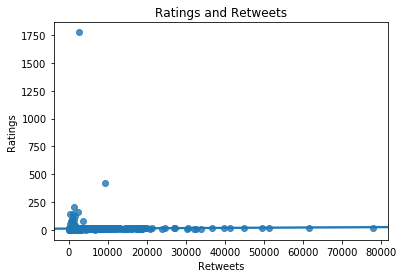

In [130]:
g = sns.regplot(x=df_new.retweets, y=df_new.rating_numerator)
plt.title("Ratings and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Ratings')
plt.show()
fig = g.get_figure()
fig.savefig('scatterplot1.png')

In [131]:
df_new['retweets'].corr(df_new['rating_numerator'])

0.018384585427120667

There is not much connection between ratings and retweets.

Let's look on unrated dogs:

In [132]:
df_new[df_new['rating_numerator']==0]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweets,favorites,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
235,835152434251116546,2017-02-24 15:40:31,When you're so blinded by your systematic plag...,0.0,10.0,None,None,3371,24183,https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg,swing,0.967066,False,American_Staffordshire_terrier,0.012731,True,Staffordshire_bullterrier,0.007039,True
756,746906459439529985,2016-06-26 03:22:31,"PUPDATE: can't see any. Even if I could, I cou...",0.0,10.0,None,None,330,3115,https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg,traffic_light,0.470708,False,fountain,0.199776,False,space_shuttle,0.064807,False


Surprisingly, underrated dogs have high number of retweets and favorites.

Let's pull the pictures of these dogs to see the reasons of low ratings

In [133]:
df_new[df_new['tweet_id']==835152434251116546].jpg_url 

235    https://pbs.twimg.com/media/C5cOtWVWMAEjO5p.jpg
Name: jpg_url, dtype: object

In [134]:
df_new[df_new['tweet_id']==746906459439529985].jpg_url 

756    https://pbs.twimg.com/media/Cl2LdofXEAATl7x.jpg
Name: jpg_url, dtype: object

So, we have:  dog in kids swing wich has 24183! favorites and Ney York at night (no dog.

**2. Favorites **

In [135]:
df_new['favorites'].describe()

count      1994.000000
mean       8900.734704
std       12629.267452
min          80.000000
25%        1939.250000
50%        4066.500000
75%       11219.250000
max      144108.000000
Name: favorites, dtype: float64

In [136]:
df_new[df_new['favorites']==144108]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweets,favorites,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
309,822872901745569793,2017-01-21 18:26:02,Here's a super supportive puppo participating ...,13.0,10.0,None,puppo,49540,144108,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,True,Labrador_retriever,0.160329,True,Irish_terrier,0.069126,True


In [137]:
#picture of this dog
df_new[df_new['tweet_id']==822872901745569793].jpg_url 

309    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

The maximum count of favorites(144,108) has puppo without name which "march for my moms". The average number of favorites is 8900, minimum 80.

In [138]:
df_new['favorites'].corr(df_new['rating_numerator'])

0.016247550008738381

There is not much connection between ratings and favorites either.

**3. Retweets **

In [139]:
df_new['retweets'].corr(df_new['favorites'])

0.91743725877830185

There is a strong correlation between favorites and retweets. As a tweet becomes Favorite, it's retweets increase.

In [140]:
df_new['retweets'].describe()

count     1994.000000
mean      2740.493480
std       4728.720444
min         13.000000
25%        613.250000
50%       1324.500000
75%       3150.000000
max      77944.000000
Name: retweets, dtype: float64

In [141]:
df_new[df_new['retweets']==77944]

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,stage,retweets,favorites,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
775,744234799360020481,2016-06-18 18:26:18,Here's a doggo realizing you can stand in a po...,13.0,10.0,None,doggo,77944,129049,https://pbs.twimg.com/ext_tw_video_thumb/74423...,Labrador_retriever,0.825333,True,ice_bear,0.044681,False,whippet,0.018442,True


Maximum retweets (77944) however has another dog without name.

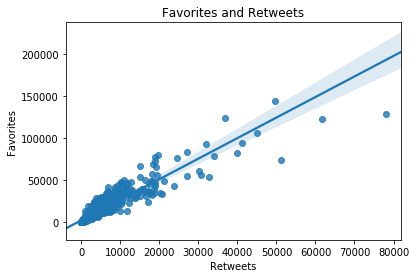

In [142]:
g = sns.regplot(x=df_new.retweets, y=df_new.favorites)
plt.title("Favorites and Retweets")
plt.xlabel('Retweets')
plt.ylabel('Favorites')
plt.show()
fig = g.get_figure()
fig.savefig('scatterplot2.png')

#### 4. Dog breeds

In [143]:
df_new['p1'].value_counts()

golden_retriever             139
Labrador_retriever            95
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
Pomeranian                    38
toy_poodle                    38
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Eskimo_dog                    18
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        17
Cardigan                      17
Shih-Tzu                      17
Rottweiler                    17
Lakeland_terrier              16
kuvasz                        16
Italian_greyhound             16
web_site                      15
          

In [144]:
df_new_p1=df_new[df_new['p1']=="golden_retriever"]
df_new_p1['p1_conf'].describe()

count    139.000000
mean       0.721001
std        0.225575
min        0.140394
25%        0.602790
50%        0.776346
75%        0.901983
max        0.993830
Name: p1_conf, dtype: float64

In [145]:
df_new_p1['p1_dog'].value_counts()

True    139
Name: p1_dog, dtype: int64

The most popular predicted dog breed is golden_retriever with mean confidency 0.72 and all images detected as dogs. There is some non dog related predictions like laptop, flamingo, orange, etc. 

In [146]:
df_new['p1'].value_counts().head(10)

golden_retriever      139
Labrador_retriever     95
Pembroke               88
Chihuahua              79
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             38
malamute               29
Name: p1, dtype: int64

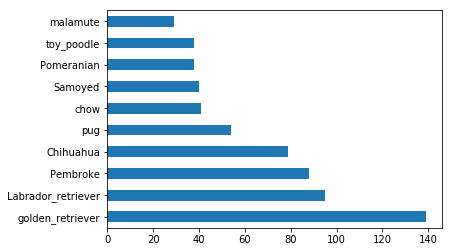

In [147]:
df_new['p1'].value_counts().head(10).plot.barh()

In [148]:
plt.savefig('brids.png')